# <center>Работа 1.2 Определение моментов инерции твёрдых тел с помощью трифилярного подвеса</center>

## Цель работы:

* измерение момента инерции ряда тел и сравнение результатов с расчётами по теоретическим формулам;

* проверка аддитивности моментов инерции и справедливости формулы Гюйгенса–Штейнера.

**В работе используются:** трифилярный подвес, счётчик числа колебаний, секундомер (совмещён со счётчиком), набор тел, момент инерции которых подлежит измерить (разрезанный диск, кольцо, брусок, плоский диск со стержнем в центре).

## Теория:

Несмотря на то, что для вычисления момента инерции есть вполне конкретная формула: $\int_V r^2\rho dV$, в большинстве случаев вычисление этого интеграла не представляется возможным из-за сложной геометрии рассматриваемого тела. В этом случае момент инерции тела можно вычислить экспериментально при помощи трифилярного подвеса:

[//]: <> (![Трифилярный подвес](susp-image.png "Рис.1 Трифилярный подвес"))
<img src="susp-image.png" alt="Drawing" style="width: 400px;"/>

Трифилярный подвес позволяет вычислить момент инерции тела, измерив период вращательных колебаний подвеса, на нижней платформе которого расположено исследуемое тело. Уравнение малых колебаний для трифилярного подвеса выглядит следующим образом:
$$
I\ddot{\varphi} + mg\frac{Rr}{z_0}\varphi = 0,
$$

где $I$ — момент инерции тела вместе с платформой, $m$ — их суммарная масса, $z_0$ — расстояние между центрами верхней и нижней платформ в положении равновесия, а $R$ и $r$ — расстояния от оси вращения до точки крепления нити на нижней и на верхней платформах соответственно. Из этого уравнения получается уравнение для момента инерции:
$$
I = kmT^2,
$$
где T - период колебаний подвеса с исследуемым телом, а $k = \displaystyle\frac{gRr}{4\pi^2z_0}$ - коэффициент постоянный для установки.

Из того, что момент инерции - это интеграл некоторой функции по объёму тела, должна иметь место **аддитивность момента инерции**: если два тела $A$ и $B$ имеют общую ось вращения, то момент инерции $I$ составного тела должен равняться сумме моментов инерций:
$$
I = I_A + I_B
$$

Для вычисления момента инерции относительно произвольной оси, при условии, что известен момент инерции тела относительно оси, параллельной данной и проходящей через центр масс, используется **теорема Гюйгенса-Штейнера**:
$$
I = I_0 + ma_0^2,
$$
где $I$ - момент инерции тела относительно рассматриваемой оси, $I_0$ - известный ранее момент инерции, $a_0$ - расстояние между осями, $m$ - масса рассматриваемого тела.


## Обработка результатов

### Параметры установки


$r = 30.2\pm 0.3$ мм - радиус верхней платформы;

$R = 114.6\pm 0.5$ мм - радиус нижней платформы;

$z_0 = 2150\pm 20$ мм - расстояние между платформами;

$M_0 = 1066.8\pm 0.5$ г - масса нижней платформы;

$\pi = 3.14159265\pm 10^{-8}$;

$g = 9.8\pm 0.1$ м/с.

Посчитаем погрешность вычисления коэффициента $k$:
$$
\sigma_k = \sqrt{
    \left(\frac{gR}{4\pi^2z_0} \sigma_r\right)^2 +
    \left(\frac{gr}{4\pi^2z_0} \sigma_R\right)^2 +
    \left(\frac{gRr}{4\pi^2z_0^2}\sigma_{z_0}\right)^2 + 
    \left(2\frac{gRr}{4\pi^3z_0}\sigma_\pi\right)
}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


r = 30.2
sig_r = 0.3

R = 114.6
sig_R = 0.5

z_0 = 2150
sig_z = 20

pi = 3.14159265
sig_pi = 10**-8

g = 9.8 * 10**3 # мм/с^2
sig_g = 0.1 * 10**3

k = g * R * r / (4 * pi**2 * z_0)

sig_k = math.sqrt(
    (k / r * sig_r) ** 2 +
    (k / R * sig_R) ** 2 +
    (k / z_0 * sig_z) ** 2 + 
    (2 * k / pi * sig_pi) ** 2
)

print('k: {} +- {} мм^2/с^2'.format(k, sig_k))

k: 399.59444355693995 +- 5.7108313304674825 мм^2/с^2


Таким образом, $k = 400\frac{\mbox{мм}^2}{\mbox{с}^2} = 4\cdot 10^{-4}\frac{\mbox{м}^2}{\mbox{с}^2}$, $\sigma_k\approx 6\frac{\mbox{мм}^2}{\mbox{с}^2} = 6\cdot 10^{-6}\frac{\mbox{м}^2}{\mbox{с}^2}$.

### Пустая установка, необходимое количество периодов

Для достижения необходимой относительной погрешности измерения периода колебаний в $0.5\%$ нужно число периодов $N$, необходимое для достижения данной погрешности. Для начала необходимо рассчитать погрешность измерения полного времени колебаний $\sigma_t$. Для этого были 7 раз проведены замеры времени колебаний в $n=10$ периодов на пустой установке: 

In [2]:
n = 10
t_empty = np.array([43.565, 43.559, 43.502, 43.532, 43.585, 43.590, 43.585])
sig_t = np.std(t_empty)
print('Среднеквадратичное отклонение t: {}'.format(sig_t))

T_empty = np.mean(t_empty) / n
sig_T = sig_t / n

N = sig_t / (0.005 * T_empty)
print('Расчётное количество периодов: ', N)


Среднеквадратичное отклонение t: 0.03005573054802589
Расчётное количество периодов:  1.379978314407029


Для большей уверенности будем рассматривать не 2 периода, как говорят расчёты, а 5.

In [3]:
N = 5
sig_T = sig_t / N
eps_T = sig_t / (N * T_empty)
print('Относительная погрешность: {}%'.format(eps_T * 100))


Относительная погрешность: 0.1379978314407029%


Итого имеем $\varepsilon_T \approx 0.14\% = 1.4\cdot 10^{-3}$.

Теперь рассчитаем момент инерции для пустой платформы:

In [4]:
def getMomentOfInertia(k, sig_k, m, sig_m, T, sig_T):
    I = k * m * T**2
    sig_I = math.sqrt(
        (m * T**2 * sig_k) ** 2 +
        (k * T**2 * sig_m) ** 2 +
        (2 * k * m * T * sig_T) ** 2
    )
    return (I, sig_I)

In [5]:
m_empty = 1066.8 # г
sig_m_empty = 0.5

I_empty, sig_I_empty = getMomentOfInertia(k, sig_k, m_empty, sig_m_empty, T_empty, sig_T) # мм^2г
print('Момент инерции пустой платформы: {} +- {} м^2*кг'.format(
    I_empty * 10**-9,
    sig_I_empty * 10**-9
))




Момент инерции пустой платформы: 0.008088583863009795 +- 0.00011779543288051704 м^2*кг


Таким образом, $I_\mbox{плат} = 8\cdot 10^{-3}\pm 2\cdot 10^{-4}~\mbox{м}^2\cdot\mbox{кг}$

## Измеряем тела

### Брусок

$m = 1075.1\pm 0.1$ г

$h = 22.0\pm 0.1$ мм

$w = 22.0\pm 0.1$ мм

$l = 204.0\pm 0.1$ мм

Как известно, момент инерции параллелепипеда со сторонами $a, b$ и $c$, массой $m$, равномерной плотностью и осью вращения, параллельной стороне $c$ и проходящей через центр масс, равен
$$
I_c = \frac m {12}(a^2 + b^2)
$$

Подставляя $a = w$, $b = l$ имеем 

In [6]:
m_brick = 1075.1
sig_m_brick = 0.1

h_brick = 22.0
sig_h_brick = 0.1

w_brick = 22.0
sig_w_brick = 0.1

l_brick = 204.0
sig_l_brick = 0.1

I_t_brick = m_brick / 12 * (w_brick**2 + l_brick**2)
sig_I_t_brick = math.sqrt(
    ((w_brick**2 + l_brick**2) / 12 * sig_m_brick)**2 +
    (w_brick * m_brick / 6 * sig_w_brick)**2 +
    (l_brick * m_brick / 6 * sig_l_brick)**2
)
print('Теоретический момент инерции: {} +- {} м^2*кг'.format(
    I_t_brick * 10**-9,
    sig_I_t_brick * 10**-9
))


Теоретический момент инерции: 0.0037718091666666662 +- 3.6932358185456952e-06 м^2*кг


Также рассчитаем экспериментальный момент инерции, исходя из полученного времени $N$ периодов $t = 18.778\pm\sigma_t$ с:

In [7]:
t_brick = 18.778

I_brick, sig_I_brick = getMomentOfInertia(
    k, sig_k, 
    m_brick + m_empty, sig_m_brick + sig_m_empty, 
    t_brick / N, sig_T)
print('Экспериментальный момент инерции: {} +- {} м^2*кг'.format(
    (I_brick - I_empty) * 10**-9,
    (sig_I_brick + sig_I_empty) * 10**-9
))

Экспериментальный момент инерции: 0.003983362363796526 +- 0.000294629811710576 м^2*кг


Итого получаем теоретический момент инерции $3.771 \cdot 10^{-3}\pm 4\cdot 10^{-6}\mbox{м}^2\mbox{кг}$, а экспериментальный - $3.9\cdot 10^{-3}\pm 3\cdot 10^{-4}\mbox{м}^2\mbox{кг}$, то есть теоретический результат был подтверждён практическим.

### Кольцо

$m = 821.1\pm0.1$ г

$h = 45.7\pm 0.1$ - высота

$D = \frac{165 + 166}{2}\pm 1$ мм - внешний диаметр

$w = 5.4\pm 0.1$ мм - толщина


Сначала выведем формулу момента инерции для кольца:
$$
I = \int_{R_1}^{R_2} dr\int_0^h dz\int_0^{2\pi}r^2\rho d\varphi = 2\pi h\rho\int_{R_1}^{R_2}r^3 dr = \frac 1 2\pi h r(R_2^4-R_1^4) = \frac 1 2 m(R_2^2 + R_1^2)
$$

Теперь, вычислим теоретический момент инерции:

In [8]:
def getRingMomentOfInertia(m, sig_m, R_1, sig_R_1, R_2, sig_R_2):
    I = 0.5 * m * (R_2**2 + R_1**2)
    sig_I = math.sqrt(
        (0.5 * (R_2**2 + R_1**2) * sig_m)**2 + \
        (m * R_2 * sig_R_2)**2 + \
        (m * R_1 * sig_R_1)**2
    )
    return I, sig_I

m_ring = 821.1
sig_m_ring = 0.1

R_2_ring = (165 + 166) / 2 / 2
sig_R_2_ring = 0.5

R_1_ring = R_2_ring - 5.4 / 2
sig_R_1_ring = sig_R_2_ring + 0.05

I_t_ring, sig_I_t_ring = getRingMomentOfInertia(
    m_ring, sig_m_ring,
    R_1_ring, sig_R_1_ring,
    R_2_ring, sig_R_2_ring
)

print('Теоретический момент инерции: {} +- {} м^2*кг'.format(
    I_t_ring * 10**-9,
    sig_I_t_ring * 10**-9
))

Теоретический момент инерции: 0.00544207221075 +- 4.961348835115023e-05 м^2*кг


Теперь рассчитаем экспериментальный момент инерции, исходя из времени $N$ периодов $t = 21.129\pm\sigma_t$ с:

In [9]:
t_ring = 21.129

I_ring, sig_I_ring = getMomentOfInertia(
    k, sig_k,
    m_ring + m_empty, sig_m_ring + sig_m_empty,
    t_ring / N, sig_T
)
print('Экспериментальный момент инерции: {} +- {} м^2*кг'.format(
    (I_ring - I_empty) * 10**-9,
    (sig_I_ring + sig_I_empty) * 10**-9
))

Экспериментальный момент инерции: 0.005382926969419249 +- 0.0003141487973868528 м^2*кг


Таким образом, теоретически момент инерции кольца составляет $5.44 \cdot 10^{-3} \pm 5\cdot 10^{-5}\mbox{м}^2\mbox{кг}$, а экспериментальный - $5.3\cdot 10^{-3}\pm 4\cdot 10^{-4}\mbox{м}^2\mbox{кг}$, то есть эксперимент подтвердил теоретический результат

### Брусок+кольцо

Проверим, выполняется ли аддитивность моментов инерции, разместив на платформе брусок и кольцо:

In [10]:
I_t_br = I_t_brick + I_t_ring
sig_I_t_br = sig_I_t_brick + sig_I_t_ring

m_br = m_brick + m_ring
sig_m_br = sig_m_brick + sig_m_ring

print('Теоретический момент инерции: {} +- {} м^2*кг'.format(
    I_t_br * 10**-9,
    sig_I_t_br * 10**-9
))

t_br = 19.117

I_br, sig_I_br = getMomentOfInertia(
    k, sig_k,
    m_br + m_empty, sig_m_br + sig_m_empty,
    t_br / N, sig_T
)

print('Экспериментальный момент инерции: {} +- {} м^2*кг'.format(
    (I_br - I_empty) * 10**-9,
    (sig_I_br + sig_I_empty) * 10**-9
))



Теоретический момент инерции: 0.009213881377416668 +- 5.330672416969593e-05 м^2*кг
Экспериментальный момент инерции: 0.009219562686822586 +- 0.0003711053351576946 м^2*кг


Теоретический момент инерции равен $9.21\cdot 10^{-3}\pm 6\cdot 10^{-5}м^2кг$, практический - $9.21\cdot 10^{-3}\pm 3.7\cdot 10^{-4}мм^2кг$, что подтверждает аддитивность момента инерции

### Диск-"Шляпа"

$m = 580.6\pm 0.1$ г

$D = \frac{169+169+170} 3\pm 1$ мм - диаметр диска

$h = 3.4\pm 0.1$ мм - толщина диска

По формуле из предыдущего пункта имеем 
$$
I = \frac 1 2 m R^2
$$

In [11]:
m_hat = 580.6
sig_m_hat = 0.1

D_hat = (169 + 169 + 170) / 3
sig_D_hat = 1

R_hat = D_hat / 2
sig_R_hat = sig_D_hat / 2

I_t_hat, sig_I_t_hat = getRingMomentOfInertia(
    m_hat, sig_m_hat,
    0, 0,
    R_hat, sig_R_hat
)

print('Теоретический момент инерции: {} +- {} м^2*кг'.format(
    I_t_hat * 10**-9,
    sig_I_t_hat * 10**-9
))

Теоретический момент инерции: 0.0020809994222222225 +- 2.4581346561173047e-05 м^2*кг


Рассчитаем экспериментальный момент инерции исходя из времени $t = 19.568\pm \sigma_t$ с $N$ колебаний

In [12]:
t_hat = 19.568

I_hat, sig_I_hat = getMomentOfInertia(
    k, sig_k,
    m_hat + m_empty, sig_m_hat + sig_m_empty,
    t_hat / N, sig_T
)
print('Экспериментальный момент инерции: {} +- {} м^2*кг'.format(
    (I_hat - I_empty) * 10**-9,
    (sig_I_hat + sig_I_empty) * 10**-9
))

Экспериментальный момент инерции: 0.0019939890888197114 +- 0.0002652281331451372 м^2*кг


Итого теоретический момент инерции составляет $2\cdot 10^{-3}\pm 3\cdot 10^{-5}$, а экспериментальный - $1.9\cdot 10^{-3}\pm 3\cdot 10^{-4}$, то есть теоретический результат подтверждён практическим.

### Два полдиска

$m = 2\cdot(721.3\pm 0.1)$ г

$D = \frac{90.0 + 90.0 + 90.0 + 90.1} 4\pm 0.1$ мм - диаметр диска

$h = 27.2\pm 0.1$ мм - высота диска

Рассчитываем теоретический момент инерции аналогично предыдущему пункту:

In [13]:
m_disk = 721.3*2
sig_m_disk = 0.2

D_disk = (90.0 + 90.0 + 90.0 + 90.1) / 4
sig_D_disk = 0.1

R_disk = D_disk / 2
sig_R_disk = sig_D_disk / 2

I_t_disk, sig_I_t_disk = getRingMomentOfInertia(
    m_disk, sig_m_disk,
    0, 0,
    R_disk, sig_R_disk
)

print('Теоретический момент инерции: {} +- {} м^2*кг'.format(
    I_t_disk * 10**-9,
    sig_I_t_disk * 10**-9
))

Теоретический момент инерции: 0.001461444075203125 +- 3.2530674671651114e-06 м^2*кг


Теперь рассчитаем моменты инерции, полученный для разных сдвигов половинок диска: изначально половинки диска образуют ровно диск, затем на каждом шаге сдвигаются на $5$ мм от центра платформы в противоположных направлениях:

In [21]:
def line_coeff_sig(x, y):
    best_line = np.polyfit(x, y, 1)
    return 1 / math.sqrt(len(x)) * math.sqrt(np.var(np.array(y)) / np.var(np.array(x)) - best_line[0]**2)

[0.14103825 1.59533654]
I = (1.410382499+-0.009405715)h^2 + (1.595337+-0.002695)


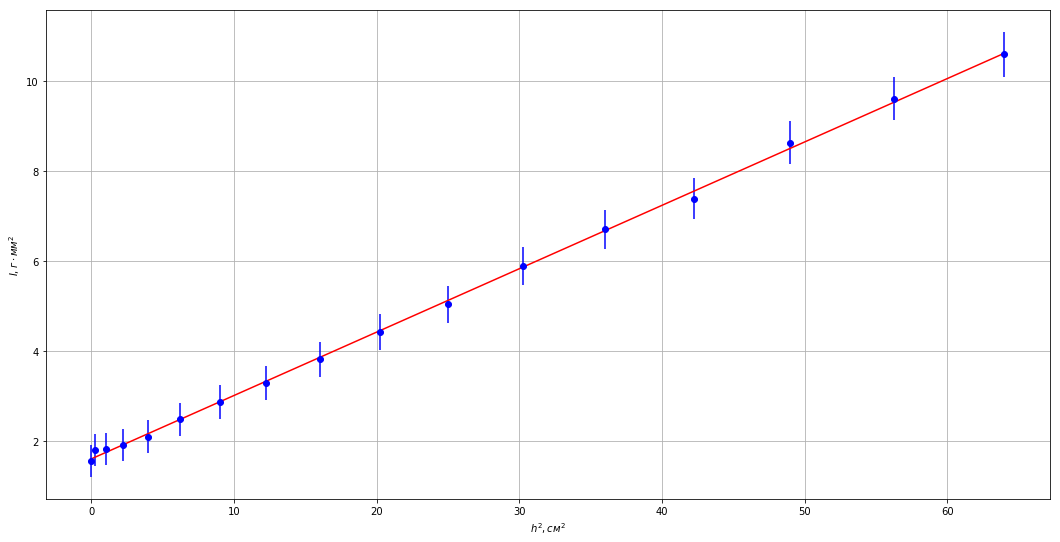

In [37]:
t_disk = np.array([15.500, 15.694, 15.719, 15.789, 15.930, 16.228, 16.521, 16.835, 17.227, 17.663, 18.087, 18.672, 19.203, 19.643, 20.419, 21.006, 21.582])

x = np.array([(5 * i) ** 2 / 100 for i in range(len(t_disk))]) # h^2, см^2

I_disk = [getMomentOfInertia(
    k, sig_k,
    m_disk + m_empty, sig_m_disk + sig_m_empty,
    t / N, sig_t
) for t in t_disk]

y = np.array([round(i - I_empty, 2) * 10**-6 for i, sig in I_disk]) # I, г*мм^2

sig_y = np.array([math.ceil((sig + sig_I_empty) * 10**-4) / 100 for i, sig in I_disk])

plt.figure(figsize=(18, 9))

plt.xlabel('$h^2, см^2$')
plt.ylabel('$I, г\cdot мм^2$')
plt.grid()
plt.errorbar(x, y, fmt='bo', yerr=sig_y)
line = np.polyfit(x, y, 1)
sig_m_disk_fit = line_coeff_sig(x, y)
sig_I_disk_fit = sig_m_disk_fit * math.sqrt(np.var(y))
# print(sig_I_disk_fit, sig_m_disk_fit)
plt.plot(x, np.poly1d(line)(x), 'r')

print(line)
print('I = ({:.9f}+-{:.9f})h^2 + ({:.6f}+-{:.6f})'.format(
    line[0] * 10, sig_m_disk_fit * 10,
    line[1], sig_I_disk_fit
))
data_raw = list(zip(x, y, sig_y))

pd.set_option('precision', 2)

halfdisk_inertia = pd.DataFrame(data=data_raw, 
                                columns=['$h^2, см^2$', '$I, г\cdot м^2$', '$\sigma_I, г\cdot м^2$'])

In [40]:
m_max = ((y[-1] + sig_y[-1]) - (y[0] - sig_y[0])) / (x[-1] - x[0])
m_min = ((y[-1] - sig_y[-1]) - (y[0] + sig_y[0])) / (x[-1] - x[0])
print((m_max - m_min) / math.sqrt(len(x)))

0.006442352540027598


In [36]:
halfdisk_inertia

,"$h^2, см^2$","$I, г\cdot м^2$","$\sigma_I, г\cdot м^2$"
0,0.00,1.55,0.35
1,0.25,1.79,0.36
2,1.00,1.82,0.36
3,2.25,1.91,0.36
4,4.00,2.09,0.36
5,6.25,2.47,0.37
6,9.00,2.86,0.38
7,12.25,3.28,0.38
8,16.00,3.81,0.39
9,20.25,4.42,0.40


Приведённые данные подтверждают рост момента инерции пропорционально квадрату расстояния от оси до центра масс, что является практическим доказательством теоремы Гюйгенса-Штейнера.

## Вывод

Результаты, полученные в ходе работы, наглядно демонстрируют корректность вычисления момента инерции при помощи трифилярного подвеса и подтверждают выполнение закона сложения моментов и теоремы Гюйгенса-Штейнера.